import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import zipfile,os

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'sulaimann'
os.environ['KAGGLE_KEY'] = '88952eb3c31573d4ef92c24dbb078df4'

download dataset 

sumber dataset https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [ ]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 33.3MB/s]


unzip dataset

In [ ]:
!unzip vehicle-dataset-from-cardekho

Archive:  vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


masukkan data ke variabel cars

In [ ]:
cars = pd.read_csv('/content/Car details v3.csv')
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


output diatas memberikan informasi sebagai berikut:
- ada 8128 baris(records atau jumlah pengamatan) dalam dataset
- terdapat 13 kolom yaitu: name year selling_price km_driven	fuel	seller_type transmission owner	mileage engine max_power torque seats

Deskripsi Variabel
1. name: nama mobil
2. year: tahun pembelian mobil
3. selling_price: harga yang diinginkan pemilik untuk menjual mobil
4. km_driven: jumlah kilometer yang ditempuh mobil tersebut
5. fuel: jenis bahan bakar mobil(Diesel/Petrol)
6. seller_type: mobil yang dijual oleh (individu/dealer)
7. transmission: transmisi gigi mobil (Automatic/Manual)
8. owner: kepemilikan mobil
9. mileage: jarak tempuh mobil
10. engine: kapasitas mesin mobil
11. max_power: tenaga maksimal mobil
12. torque: torsi mobil
13. seats: jumlah penumpang

menambahkan variabel tahun yang berisikan 2021 adalah tahun saat model ini di buat

In [ ]:
cars['current'] = 2021

menambahkan variabel age untuk kolom usia mobil

In [ ]:
cars['age']=cars['current']-cars['year']

hapus kolom yang tidak di butuhkan

In [ ]:
cars.drop(['current','year','name','mileage','engine','max_power','torque','seats'],axis=1,inplace=True)
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,450000,145500,Diesel,Individual,Manual,First Owner,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,15
3,225000,127000,Diesel,Individual,Manual,First Owner,11
4,130000,120000,Petrol,Individual,Manual,First Owner,14


cek informasi pada dataset

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   selling_price  8128 non-null   int64 
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   seller_type    8128 non-null   object
 4   transmission   8128 non-null   object
 5   owner          8128 non-null   object
 6   age            8128 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 444.6+ KB


Dari output di atas dapat dilihat bahwa:
- terdapat 4 kolom dengan tipe object, yaitu: furl, seller_type, trasmission, owner. kolom ini merupakan categorical features(fitur non-numerik)
- terdapat 3 kolom numerik dengan tipe int64, yaitu: selling_price, km_driven, age. kolom ini merupakan numerical features(fitur numerik)

cek ukuran data

In [ ]:
cars.shape

(8128, 7)

cek data kosong

In [ ]:
cars.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
age              0
dtype: int64

cek deskripsi statistik data

In [ ]:
cars.describe()

,selling_price,km_driven,age
count,8.128000e+03,8.128000e+03,8128.000000
mean,6.382718e+05,6.981951e+04,7.195989
std,8.062534e+05,5.655055e+04,4.044249
min,2.999900e+04,1.000000e+00,1.000000
25%,2.549990e+05,3.500000e+04,4.000000
50%,4.500000e+05,6.000000e+04,6.000000
75%,6.750000e+05,9.800000e+04,10.000000
max,1.000000e+07,2.360457e+06,38.000000


fungsi describe() memberikan informasi statistik pada masing-masing kolom , antara lain:
- count adalah jumlah sampel pada data
- mean adalah nilai rata-rata
- std adalah standar deviasi
- min adalah nilai minimum setiap kolom
- 25% adalah kuartil pertama. kuartil adalah nilai yang menandai batas interval dalam empat bagian yang sama
- 50% adalah kuartil kedua, atau juga bisa di sebut median(nilai tengah)
- 75% adalah kuartil ketiga
- max adalah nilai maksimum

**Menangani Outliers**

menggunakan teknik teknik visualisasi data.


visualisasi pada fitur numerik
- selling_price
- km_driven
- age


1. fitur selling price

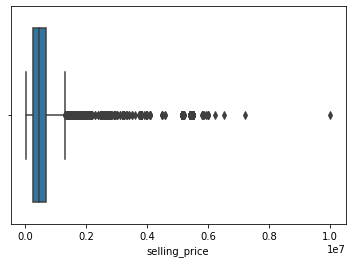

In [ ]:
sns.boxplot(x=cars['selling_price'])

2. fitur km_driven

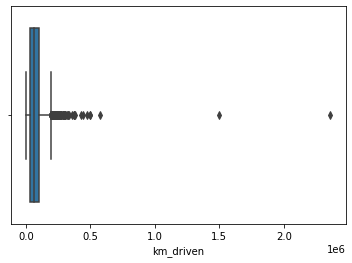

In [ ]:
sns.boxplot(x=cars['km_driven'])

3. fitur age

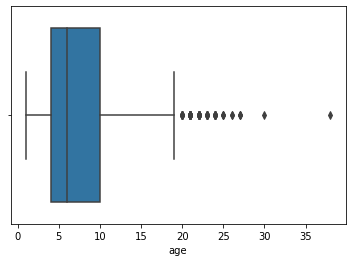

In [ ]:
sns.boxplot(x=cars['age'])

drop outliners dan cek ukuran dataset

In [ ]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR=Q3-Q1
carss=cars[~((cars<(Q1-1.5*IQR))|(cars>(Q3+1.5*IQR))).any(axis=1)]
     
cars.shape

(8128, 7)

### Exploratory Data Analysis

#### Univariate Analysis

---


proses analisis data dengan teknik Univariate EDA. Pertama, bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
numerical_feature = ['selling_price','km_driven','age']
categorical_feature = ['fuel','seller_type','owner']

Categorical Features
- bahan bakar
- seller_type
- owner

1. fitur bahan bakar

        jumlah sampel  persentase
Diesel           3755        54.2
Petrol           3437        44.7
CNG                55         0.7
LPG                35         0.5


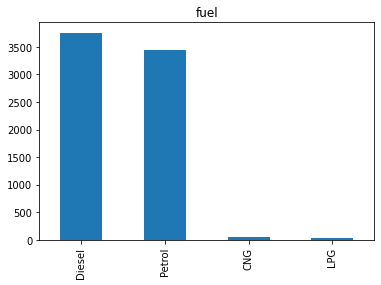

In [ ]:
feature = categorical_feature[0]
count = carss[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

2. fitur seller type

                  jumlah sampel  persentase
Individual                 6288        83.2
Dealer                      790        13.9
Trustmark Dealer            204         2.9


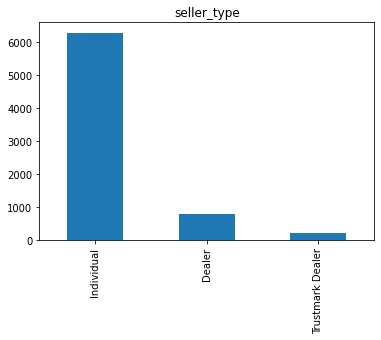

In [ ]:
feature = categorical_feature[1]
count = carss[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

3. fitur owner

                      jumlah sampel  persentase
First Owner                  4663.0        65.1
Fourth & Above Owner          150.0         2.1
Second Owner                 1954.0        25.9
Test Drive Car                  NaN         0.1
Third Owner                   515.0         6.8


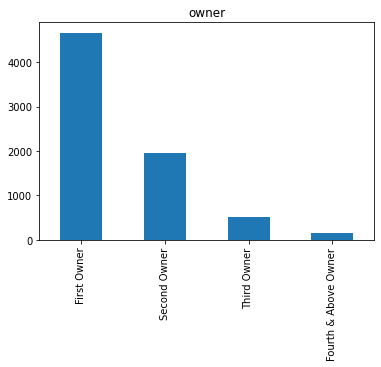

In [ ]:
feature = categorical_feature[2]
count = carss[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Numerical Features

melihat histogram di masing-masing fitur



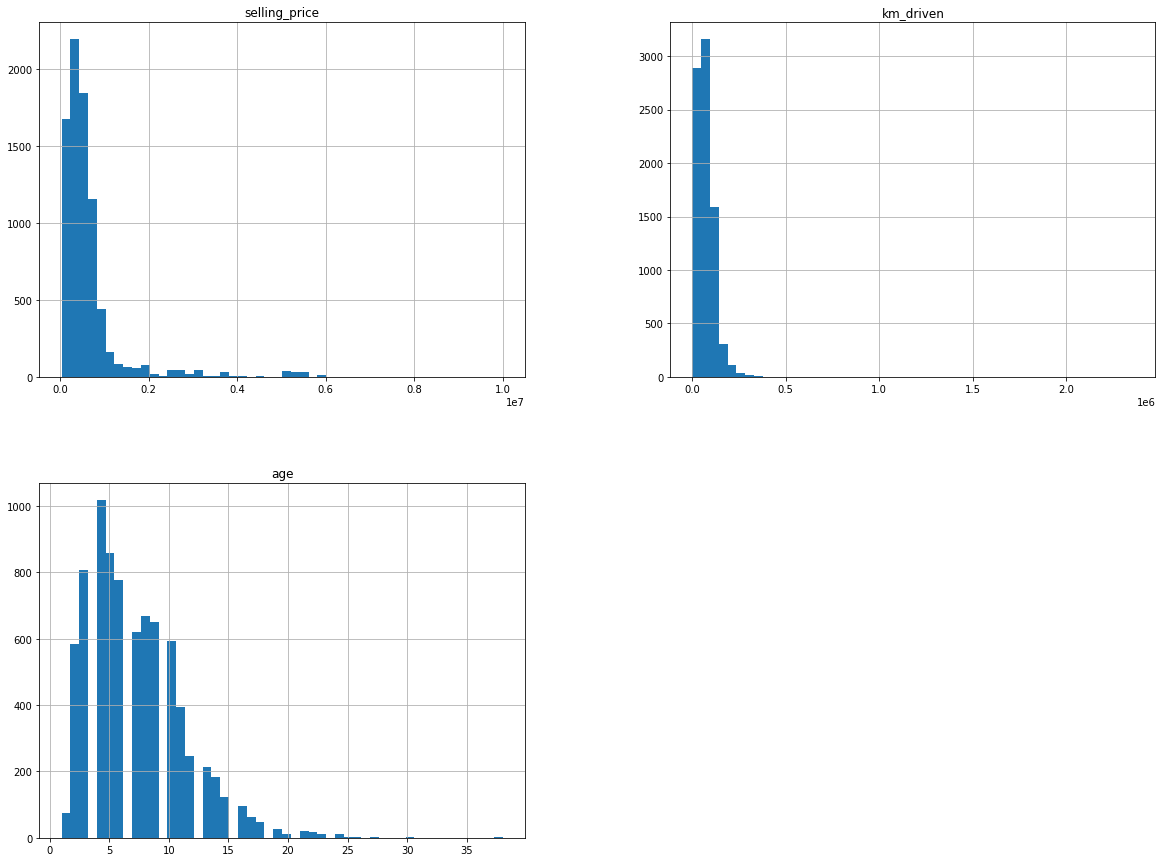

In [ ]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

#### Multivariate Analysis


---


Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA.


---


Melakukan analisis data pada fitur kategori dan numerik

**Categorical Features**

cek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga

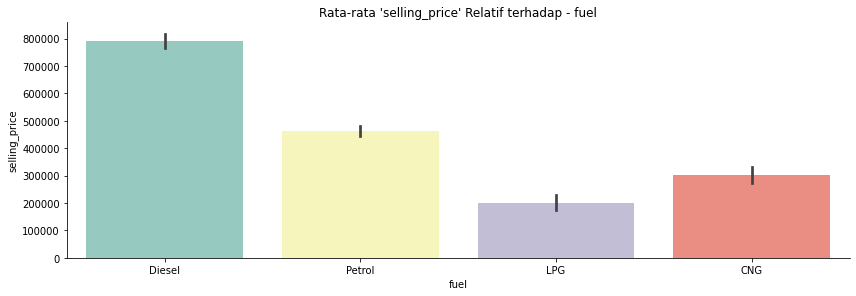

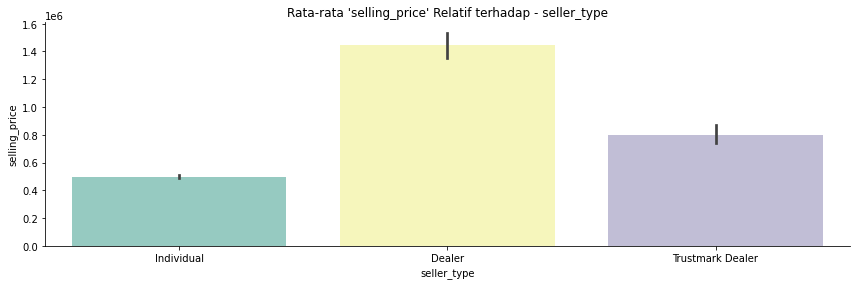

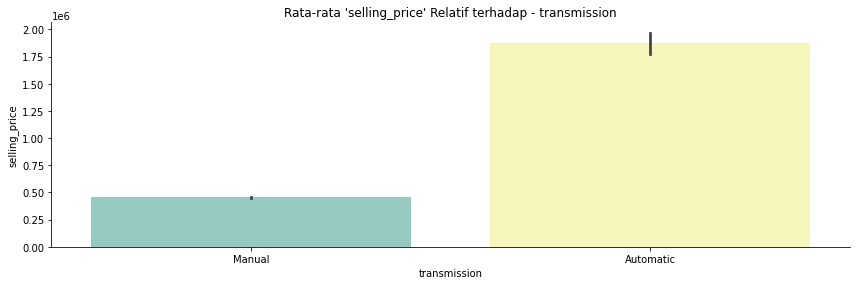

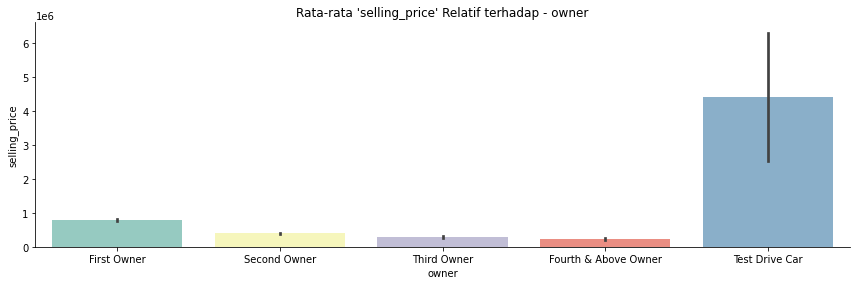

In [ ]:
cat_features = cars.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height=4, aspect=3, data=cars, palette="Set3")
  plt.title("Rata-rata 'selling_price' Relatif terhadap - {}".format(col))

**Numerical Features**

observasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr()



mengamati hubungan antar fitur numerik dengan fungsi pairplot()

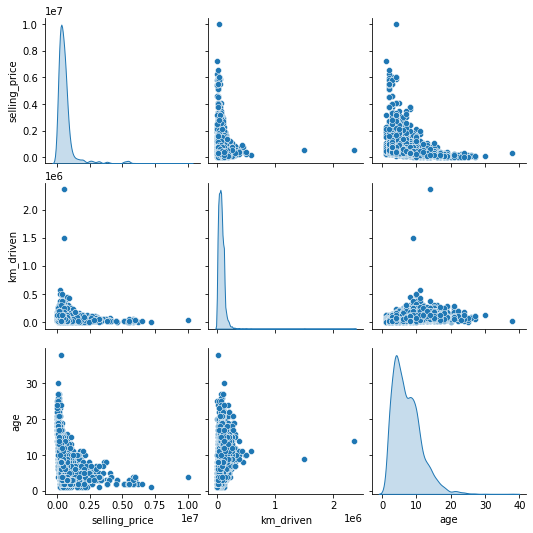

In [ ]:
sns.pairplot(cars, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

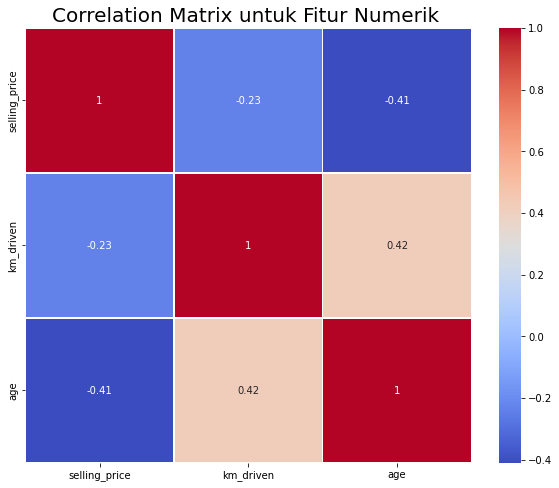

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = cars.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation


---

Data Preparation pada proyek ini berfungsi untuk mentransformasi pada data sehingga menjadi bentuk yang cocok untuk proses permodelan

1.   Encoding fitur kategori.
2.   Pembagian dataset dengan fungsi train_test_split dari library sklearn.
3.   Standarisasi.



**1. Encoding Fitur Kategori**

One-Hot Encoding adalah teknik yang merubah setiap nilai di dalam kolom menjadi kolom baru dan mengisinya dengan nilai biner dari variabel kategori ke variabel numerik menjadi 0 dan 1. One-hot-encoding berfungsi untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori.



In [ ]:
from sklearn.preprocessing import  OneHotEncoder
cars = pd.concat([cars, pd.get_dummies(cars['fuel'], prefix='fuel', drop_first=True)],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['seller_type'], prefix='seller_type', drop_first=True)],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['transmission'], prefix='transmission', drop_first=True)],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['owner'], prefix='owner', drop_first=True)],axis=1)
cars.drop(['fuel','seller_type','transmission','owner'], axis=1, inplace=True)
cars.head()

,selling_price,km_driven,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,7,1,0,0,1,0,1,0,1,0,0
2,158000,140000,15,0,0,1,1,0,1,0,0,0,1
3,225000,127000,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,14,0,0,1,1,0,1,0,0,0,0


**2. Train Test Split**

Membagi dataset menjadi data latih (train) dan data uji (test)
    - Data Train: Sebagai data yang digunakan model untuk belajar pola yang dimiliki data
    - Data Test: Berguna untuk memahami model kita bekerja di kondisi sesungguhnya (real-life situation)
    
Pentingnya proses ini karena dalam Machine Learning, hal yang kita pedulikan adalah seberapa baik kinerja model ketika dihadapkan pada data yang belum pernah dilihat sebelumnya. Oleh karena itulah, kita selalu melatih dan menguji model menggunakan dua data yang berbeda.

In [ ]:
from sklearn.model_selection import train_test_split
     
X = cars.drop(["selling_price"],axis =1)
y = cars["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

cek jumlah sample

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8128
Total # of sample in train dataset: 7315
Total # of sample in test dataset: 813


**3. Standarisasi**

Standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Melakukan proses standarisasi setelah proses pembagian data train dan data test berguna untuk menghindari kebocoran informasi pada data uji, dengan menerapkan fitur standarisasi pada data latih.

Menggunakan teknik StandarScaler dari library Scikitlearn, StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.

In [ ]:
from sklearn.preprocessing import StandardScaler
     
numerical_features = ['km_driven', 'age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,km_driven,age
5958,-0.537120,-0.542333
1791,-0.224880,-0.295157
1321,-0.519774,-0.789508
4965,0.694496,-0.542333
1635,0.174095,0.693544


cek nilai mean dan standar deviasi

In [ ]:
X_train[numerical_features].describe().round(3)

,km_driven,age
count,7315.000,7315.000
mean,-0.000,0.000
std,1.000,1.000
min,-1.214,-1.531
25%,-0.607,-0.790
50%,-0.173,-0.295
75%,0.486,0.694
max,39.733,7.614


# Modeling

Menggunakan 3 Algoritma Machine Learning antara lain Random Forest, KNN(K-Nearest Neighhbor), Boosting Algorithm, kemudian membandingkan performanya.


---


- KNN(K-Nearest Neighhbor)

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k-tetangga terdekat
- Random Forest

Random Forest berawal dari memecah data sampel yang ada kedalam decision tree secara acak. Setelah pohon terbentuk,maka akan dilakukan voting pada setiap kelas dari data sampel. Kemudian, mengkombinasikan vote dari setiap kelas kemudian diambil vote yang paling banyak.
- Boostiing Algorithm

Boosting Algorithm bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

Siapkan dataframe

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Latih dataset dengan algoritma KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

Latih dataset dengan algoritma Random Forest

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

Latih dataset dengan algoritma Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
     
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation


---


metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi

Proses scaling terhadap data uji

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


evaluasi model dengan metrix MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,1.09579e+08,1.39771e+08
RF,3.75096e+07,2.03903e+08
Boosting,2.69155e+08,3.52695e+08


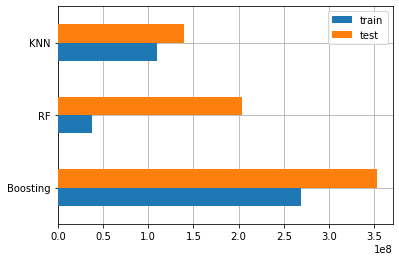

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model KNN memberikan nilai eror yang paling kecil. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga mobil

# Pengujian

---



In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
     
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
186,100000,87800.0,56693.6,186483.1
